# Importing modules and reading data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [17]:
drug = "17-AAG"
df = pd.read_csv("./drug data/" + drug + ".csv")

### Preprocessing Data

In [3]:
x = pd.get_dummies(df.drop(['AUC', 'Cell line'], axis=1))
y = df["AUC"]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

# Adding layers and training the model

In [5]:
model = Sequential()

In [6]:
model.add(Dense(units=32, activation='relu', input_dim=len(x_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

D:\anaconda3\envs\TF\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling

In [7]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training

In [8]:
model.fit(x_train,y_train, epochs=50,batch_size=8)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.5984
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3281
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2997
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3024
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2837
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.2623
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2653
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2605
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2564
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2482
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2456
Epoch 12/50
96/96 ━━━━━━━━━━━━

# Predicition and Finding Correlation

### Setting up predictions and test case

In [9]:
values = model.predict(x_test)

pred = []
for i in values:
    pred.append(i[0])
pred = np.array(pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [10]:
y_test = y_test.to_numpy()

### Plotting Graph

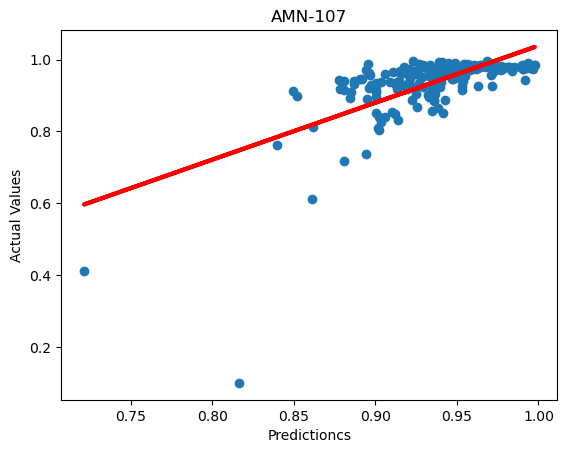

In [11]:
plt.scatter(pred,y_test)
plt.xlabel("Predictioncs")
plt.ylabel("Actual Values")
plt.title(drug)
m, b = np.polyfit(pred, y_test, 1)
plt.plot(pred, m*pred+b, lw=3, color="red")

### Finding Pearson correlation coefficient


In [12]:
import math

In [13]:
pred_n = pred - pred.mean()
y_test_n = y_test - y_test.mean()

In [14]:
num = sum(pred_n*y_test_n)

In [15]:
den = math.sqrt(sum(pred_n**2)*sum(y_test_n**2))

|PCC|Value|
|:----|:----|
|0 < r ≤  0.19|Very Low Correlation|
|0.2 ≤ r ≤ 0.39|Low Correlation|
|0.4 ≤ r ≤ 0.59|Moderate Correlation|
|0.6 ≤ r ≤ 0.79| High Correlation|
|0.8 ≤ r ≤ 1.0|Very High Correlation|


In [16]:
pcc = num/den
print("Pearson correlation coefficient comes out to be:",pcc)

Pearson correlation coefficient comes out to be: 0.6526748210822755
